In [1]:
#Importation des librairies
import warnings
warnings.filterwarnings("ignore")

import os
import re
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import nltk
import nlp_module
import string,unicodedata
from sklearn.preprocessing import MultiLabelBinarizer

from string import punctuation
from nltk.corpus import stopwords
from time import time

pd.set_option("display.max_columns", None)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

## Import du dataset et vérification de la donnée

In [3]:
df1 = pd.read_csv("QueryResults1.csv", sep=',')
df2 = pd.read_csv("QueryResults2.csv", sep=',')
df3 = pd.read_csv("QueryResults3.csv", sep=',')


In [4]:
df1

Title  \
0      How do I set permissions (attributes) on a fil...   
1               How do you get a directory listing in C?   
2                       Returning DataTables in WCF/.NET   
3      flutter: no refresh indicator when using Refre...   
4      Angularjs Form/Field validation using JavaScri...   
...                                                  ...   
46032  How do I fix the npm UNMET PEER DEPENDENCY war...   
46033     Why does Math.min() return -0 from [+0, 0, -0]   
46034  What's the mathematical reason behind Python c...   
46035  Unable to load class AndroidComponentsExtensio...   
46036        CentOS through a VM - no URLs in mirrorlist   

                                                    Body  \
0      <p>When I extract files from a ZIP file create...   
1      <p>How do you scan a directory for folders and...   
2      <p>I have a WCF service from which I want to r...   
3      <p>I added the RefreshIndicator to my page, bu...   
4      <p>Is there a way to validate a field in angul...   
...                                                  ...   
46032  <p>I'm on Windows 10, with Node 5.6.0 and npm ...   
46033  <p>I know (-0 === 0) comes out to be true. I a...   
46034  <p>I know Python <code>//</code> rounds toward...   
46035  <p>I recently downloaded <a href="https://deve...   
46036  <p>I am trying to run a <a href="https://en.wi...   

                                                    Tags        Id  Score  \
0      <python><attributes><zip><file-permissions><zi...    434641     46   
1      <c><file><directory><cross-platform><common-ta...     12489     65   
2               <c#><.net><wcf><web-services><datatable>     12702     51   
3      <flutter><dart><refresh><pull-to-refresh><indi...  54051121     33   
4      <javascript><validation><angularjs><angular-ui...  18125777     10   
...                                                  ...       ...    ...   
46032  <angularjs><node.js><npm><npm-install><angular...  35738346    283   
46033  <javascript><math><floating-point><min><negati...  70450352     59   
46034  <python><c++><python-3.x><rounding><integer-di...  70730831     85   
46035  <android><android-gradle-plugin><android-archi...  70857476    123   
46036       <linux><centos><vagrant><virtualbox><redhat>  70926799     51   

       ViewCount  FavoriteCount  AnswerCount  
0          29340              7            8  
1         136478             21            9  
2          56219             12            8  
3          46515              7            5  
4          30234              7            4  
...          ...            ...          ...  
46032     338197             48           13  
46033       3803              7            4  
46034       7540              9            8  
46035      12650              7            7  
46036      49435             21            2  

[46037 rows x 8 columns]

In [5]:
df = pd.concat([df1, df2], ignore_index=True)
df = pd.concat([df, df3], ignore_index=True)
df = df.drop_duplicates()

<AxesSubplot:>

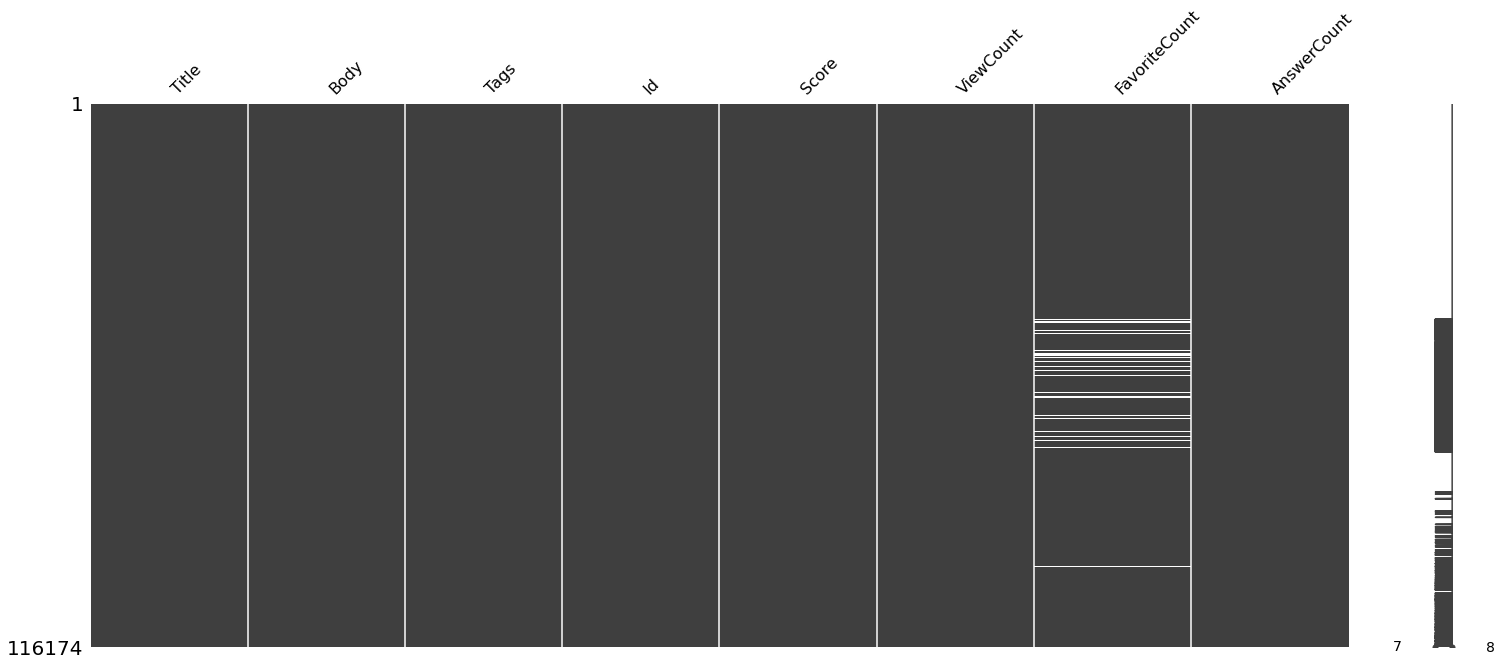

In [6]:
msno.matrix(df)

In [7]:
df["Score"].describe()

count    116174.000000
mean         64.677733
std         248.628383
min           6.000000
25%          16.000000
50%          27.000000
75%          52.000000
max       26354.000000
Name: Score, dtype: float64

In [8]:
df["ViewCount"].describe()

count    1.161740e+05
mean     6.307668e+04
std      1.714967e+05
min      5.500000e+01
25%      7.994000e+03
50%      2.343800e+04
75%      5.936775e+04
max      9.841945e+06
Name: ViewCount, dtype: float64

In [9]:
df["FavoriteCount"].describe()

count    111814.000000
mean         23.519202
std         105.739197
min           0.000000
25%           6.000000
50%          10.000000
75%          19.000000
max       11570.000000
Name: FavoriteCount, dtype: float64

In [10]:
df["AnswerCount"].describe()

count    116174.000000
mean          5.275879
std           5.321968
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max         125.000000
Name: AnswerCount, dtype: float64

## Analyse Univariée

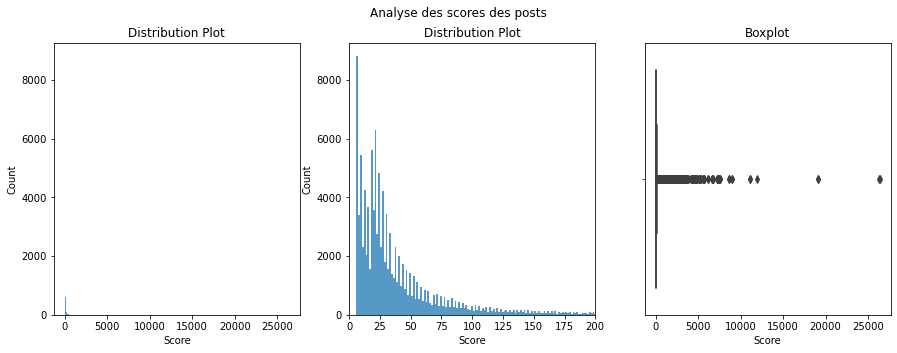

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des scores des posts")

sns.histplot(ax=axes[0], x="Score", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="Score", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,200])

sns.boxplot(ax=axes[2], x="Score", data=df)
axes[2].set_title("Boxplot")

plt.show()

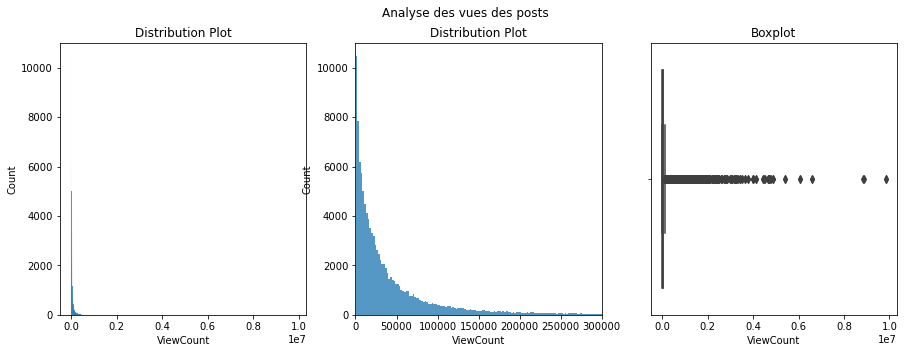

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des vues des posts")

sns.histplot(ax=axes[0], x="ViewCount", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="ViewCount", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,300000])

sns.boxplot(ax=axes[2], x="ViewCount", data=df)
axes[2].set_title("Boxplot")

plt.show()

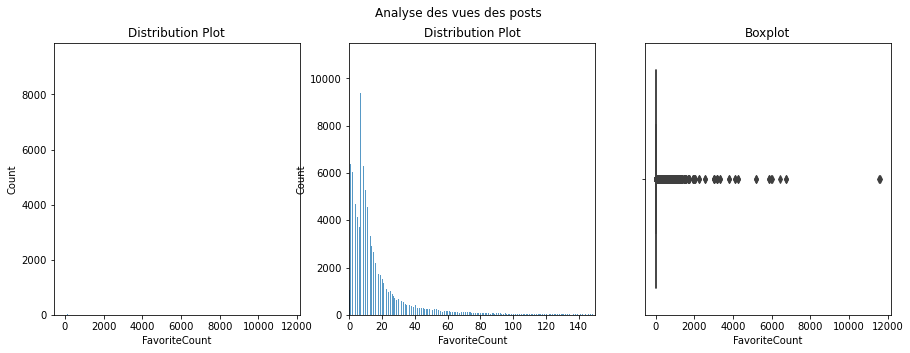

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des vues des posts")

sns.histplot(ax=axes[0], x="FavoriteCount", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="FavoriteCount", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,150])
axes[1].set_ylim([0,11500])

sns.boxplot(ax=axes[2], x="FavoriteCount", data=df)
axes[2].set_title("Boxplot")

plt.show()

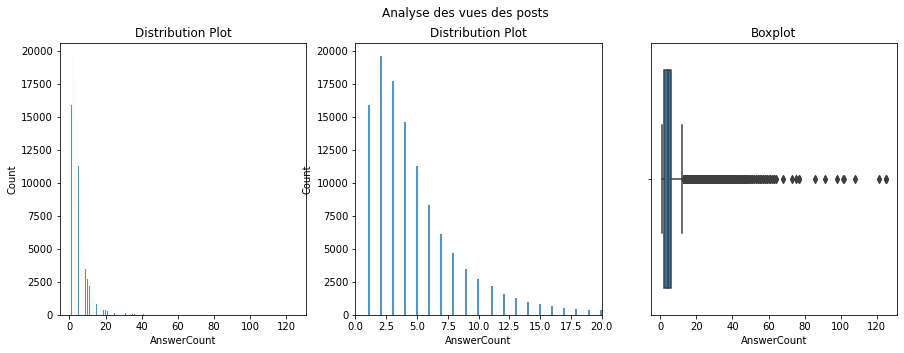

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des vues des posts")

sns.histplot(ax=axes[0], x="AnswerCount", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="AnswerCount", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,20])

sns.boxplot(ax=axes[2], x="AnswerCount", data=df)
axes[2].set_title("Boxplot")

plt.show()

In [15]:
df["Tags"]

0         <python><attributes><zip><file-permissions><zi...
1         <c><file><directory><cross-platform><common-ta...
2                  <c#><.net><wcf><web-services><datatable>
3         <flutter><dart><refresh><pull-to-refresh><indi...
4         <javascript><validation><angularjs><angular-ui...
                                ...                        
124742         <android><camera><android-camera><adb><ddms>
124743    <c#><asp.net-mvc-5><entity-framework-6><asp.ne...
124744            <javascript><css><html><tags><mime-types>
124745    <git><git-submodules><git-clone><cloning><git-...
124747    <java><android><gson><bouncycastle><android-lint>
Name: Tags, Length: 116174, dtype: object

In [16]:
df["Tags"] = df["Tags"].str.replace("<","")
df["Tags"] = df["Tags"].str.replace(">"," ")

In [17]:
df["Tags"] = df.Tags.apply(lambda x: x[0:-1].split(' '))

In [18]:
df["Tags"]

0         [python, attributes, zip, file-permissions, zi...
1         [c, file, directory, cross-platform, common-ta...
2                  [c#, .net, wcf, web-services, datatable]
3         [flutter, dart, refresh, pull-to-refresh, indi...
4         [javascript, validation, angularjs, angular-ui...
                                ...                        
124742         [android, camera, android-camera, adb, ddms]
124743    [c#, asp.net-mvc-5, entity-framework-6, asp.ne...
124744            [javascript, css, html, tags, mime-types]
124745    [git, git-submodules, git-clone, cloning, git-...
124747    [java, android, gson, bouncycastle, android-lint]
Name: Tags, Length: 116174, dtype: object

In [19]:
df["Tags_cpt"] = df.Tags.str.len()
df["Tags_cpt"].describe()

count    116174.0
mean          5.0
std           0.0
min           5.0
25%           5.0
50%           5.0
75%           5.0
max           5.0
Name: Tags_cpt, dtype: float64

In [20]:
df_tags = pd.DataFrame(df['Tags'].to_list(), columns = ['Tags1', 'Tags2', 'Tags3','Tags4','Tags5'])

In [22]:
df_tags

Tags1           Tags2               Tags3             Tags4  \
0           python      attributes                 zip  file-permissions   
1                c            file           directory    cross-platform   
2               c#            .net                 wcf      web-services   
3          flutter            dart             refresh   pull-to-refresh   
4       javascript      validation           angularjs        angular-ui   
...            ...             ...                 ...               ...   
116169     android          camera      android-camera               adb   
116170          c#   asp.net-mvc-5  entity-framework-6  asp.net-identity   
116171  javascript             css                html              tags   
116172         git  git-submodules           git-clone           cloning   
116173        java         android                gson      bouncycastle   

                     Tags5  
0                  zipfile  
1             common-tasks  
2                datatable  
3                indicator  
4              ui-validate  
...                    ...  
116169                ddms  
116170  repository-pattern  
116171          mime-types  
116172          git-remote  
116173        android-lint  

[116174 rows x 5 columns]

In [23]:
tag_list = ""
for tab in df["Tags"]:
    for tag in tab:
        tag_list+=tag+" "

In [24]:
tag_list

'python attributes zip file-permissions zipfile c file directory cross-platform common-tasks c# .net wcf web-services datatable flutter dart refresh pull-to-refresh indicator javascript validation angularjs angular-ui ui-validate javascript jquery ajax html scroll php mysql pdo mysqli database-abstraction .net class struct value-type reference-type .net windows plugins add-in extensibility c image opencv webcam resolutions asp.net-mvc unit-testing mocking moq rhino-mocks python excel vba shell py2exe java xml json cross-platform configuration-files css browser fonts stylesheet default c++ unit-testing cross-platform code-coverage cppunit ruby-on-rails ruby activerecord rspec observer-pattern github dns jekyll github-pages cname xcode macos templates xcode4 xcode4.5 php mysql wordpress lamp mediawiki sql-server sql-server-2005 sqldatatypes notnull emptydatatext java security cookies xss httponly algorithm language-agnostic functional-programming recursion tail-recursion c++ c gcc symbol

In [25]:
tag_list = tag_list.split(" ")
tag_serie = pd.Series(tag_list, copy=False)
vc = tag_serie.value_counts()

In [26]:
limit = 500
tags_allowed = vc[vc>=limit].index.tolist()
tags_banned = vc[vc<limit].index.tolist()

In [27]:
vc.count()

20777

In [28]:
len(tags_allowed)

148

In [29]:
tags_allowed

['java',
 'c#',
 'python',
 'javascript',
 'c++',
 'ios',
 'android',
 '.net',
 'html',
 'objective-c',
 'php',
 'c',
 'jquery',
 'iphone',
 'css',
 'linux',
 'performance',
 'node.js',
 'sql',
 'swift',
 'asp.net',
 'xcode',
 'spring',
 'c++11',
 'windows',
 'json',
 'asp.net-mvc',
 'multithreading',
 'mysql',
 'ruby-on-rails',
 'algorithm',
 'arrays',
 'string',
 'sql-server',
 'database',
 'macos',
 'ruby',
 'django',
 'unit-testing',
 'python-3.x',
 'gcc',
 'reactjs',
 'cocoa-touch',
 'visual-studio',
 'wpf',
 'bash',
 'git',
 'numpy',
 'ajax',
 'r',
 'pandas',
 'image',
 'angularjs',
 'google-chrome',
 'hibernate',
 'postgresql',
 'security',
 'rest',
 'angular',
 'entity-framework',
 'http',
 'eclipse',
 'optimization',
 'shell',
 'spring-boot',
 'debugging',
 'xml',
 'jpa',
 'typescript',
 'maven',
 'assembly',
 'android-studio',
 'list',
 'laravel',
 'asynchronous',
 'machine-learning',
 'templates',
 'language-lawyer',
 'class',
 'ssl',
 'asp.net-core',
 'ipad',
 'amazon-web-s

In [30]:
tags_banned

['tomcat',
 'oracle',
 'asp.net-mvc-3',
 'command-line',
 'caching',
 'object',
 'serialization',
 'stl',
 'winapi',
 '.net-core',
 'sql-server-2008',
 'https',
 'tensorflow',
 'firefox',
 'design-patterns',
 'github',
 'flutter',
 'ios7',
 'video',
 'visual-c++',
 'dependency-injection',
 'utf-8',
 'functional-programming',
 'sqlite',
 'intellij-idea',
 'asp.net-mvc-4',
 'vb.net',
 'internet-explorer',
 'uiview',
 'jakarta-ee',
 'collections',
 'scipy',
 'floating-point',
 'events',
 'pdf',
 'build',
 'ecmascript-6',
 'boost',
 'webpack',
 'junit',
 'keras',
 'csv',
 'url',
 'dom',
 'browser',
 'animation',
 'loops',
 'hash',
 'installation',
 'kotlin',
 'wcf',
 'networking',
 'excel',
 'vector',
 'facebook',
 'pip',
 'iis',
 'selenium-webdriver',
 'encryption',
 'language-agnostic',
 'compiler-construction',
 'flask',
 'c++14',
 'variables',
 'android-gradle-plugin',
 'scikit-learn',
 'database-design',
 'swing',
 'encoding',
 'mocking',
 'deep-learning',
 'clang',
 'cookies',
 'audi

In [31]:
len(tags_banned)

20629

In [32]:
df_tags[~df_tags.isin(tags_allowed)] = "None"

In [34]:
df_tags

Tags1       Tags2      Tags3         Tags4 Tags5
0           python        None       None          None  None
1                c        file       None          None  None
2               c#        .net       None  web-services  None
3             None        None       None          None  None
4       javascript  validation  angularjs          None  None
...            ...         ...        ...           ...   ...
116169     android        None       None          None  None
116170          c#        None       None          None  None
116171  javascript         css       html          None  None
116172         git        None       None          None  None
116173        java     android       None          None  None

[116174 rows x 5 columns]

In [35]:
df_tags["Tags1"].describe()

count     116174
unique       146
top         java
freq       13459
Name: Tags1, dtype: object

In [36]:
df_tags["Tags2"].describe()

count     116174
unique       149
top         None
freq       34240
Name: Tags2, dtype: object

In [37]:
df_tags["Tags3"].describe()

count     116174
unique       148
top         None
freq       72868
Name: Tags3, dtype: object

In [38]:
df_tags["Tags4"].describe()

count     116174
unique       148
top         None
freq      100507
Name: Tags4, dtype: object

In [39]:
df_tags["Tags5"].describe()

count     116174
unique       140
top         None
freq      112455
Name: Tags5, dtype: object

In [ ]:
allowed=[]
removed=[]

for row in df["Tags"]:
    for tag in row:
        if tag not in tags_allowed:
            row.remove(tag)
            removed.append(tag)
        else:
            allowed.append(tag)

In [ ]:
removed

On retire ici les tags qui sont peu utilisés dans notre dataset

In [ ]:
df["Tags"]

In [ ]:
df

In [ ]:
df = df.dropna()
df

## Analyse bivariée

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
sns.scatterplot(data=df, x="ViewCount", y="Score")
plt.show()

In [ ]:
sns.scatterplot(data=df, x="FavoriteCount", y="Score")
plt.show()

In [ ]:
sns.scatterplot(data=df, x="AnswerCount", y="Score")
plt.show()

In [ ]:
sns.scatterplot(data=df, x="AnswerCount", y="ViewCount")
plt.show()

In [ ]:
sns.scatterplot(data=df, x="AnswerCount", y="FavoriteCount")
plt.show()

In [ ]:
sns.scatterplot(data=df, x="ViewCount", y="FavoriteCount")
plt.show()

## Analyse de texte

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,6))
text_len=df['Title'].str.len()
ax1.hist(text_len,color='lightcoral')
ax1.set_title('Characters in Title')
text_len=df['Body'].str.len()
ax2.hist(text_len,color='lightgreen')
ax2.set_title('Characters in Body')
text_len=df['Tags'].str.len()
ax3.hist(text_len,color='lightskyblue')
ax3.set_title('Characters in Tags')
fig.suptitle('Characters in each category')
plt.show()

In [ ]:
from bs4 import BeautifulSoup

df['Title'] = df['Title'].apply(lambda x: BeautifulSoup(x, 'html').get_text())
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x, 'html').get_text())

In [ ]:
df["Title"]

In [ ]:
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
df['Title'] = df['Title'].str.replace(pat, '')
df['Title'] = df['Title'].str.replace(r'\s+', ' ')
df['Body'] = df['Body'].str.replace(pat, '')
df['Body'] = df['Body'].str.replace(r'\s+', ' ')

In [ ]:
df["Title"]

In [ ]:
df["Body"]

In [ ]:
for tags in df["Tags"]:
    print(tags)

In [ ]:
df["Tags_cpt"] = df.Tags.str.len()

On stock ici le nombre de tags de chaque post 

In [ ]:
df["Tags_cpt"].describe()

Il y a un maximum de 5 tags pour chaque post, on va donc découper nos tags sur 5 colonnes et remplir les champs vides par le premier tag

In [ ]:
df_tags = pd.DataFrame(df['Tags'].to_list(), columns = ['Tags1', 'Tags2', 'Tags3','Tags4','Tags5'])

In [ ]:
df_tags

Après certaines réflexions pour la modélisation on a décidé de ne garder que les posts qui ont au moins 3 tags. On va également supprimer les 4èmes et 5èmes tags pour uniformiser la donnée

In [ ]:
df_tags = df_tags.drop(['Tags4', 'Tags5'], axis=1)

In [ ]:
df = df.join(df_tags)

In [ ]:
df = df.drop(columns=["Tags", "Id","Score","ViewCount","FavoriteCount","AnswerCount","Tags_cpt"])

In [ ]:
df

In [ ]:
df = df.dropna()
df

In [ ]:
msno.matrix(df)

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.to_csv("df.csv", index=False)

In [ ]:
df["Tags1"].describe()

In [ ]:
df["Tags2"].describe()

In [ ]:
df["Tags3"].describe()